6695
       agecat_Adult  agecat_Baby  agecat_Senior  agecat_Young
count   6695.000000  6695.000000    6695.000000   6695.000000
mean       0.497386     0.123226       0.082599      0.296789
std        0.500031     0.328721       0.275296      0.456877
min        0.000000     0.000000       0.000000      0.000000
25%        0.000000     0.000000       0.000000      0.000000
50%        0.000000     0.000000       0.000000      0.000000
75%        1.000000     0.000000       0.000000      1.000000
max        1.000000     1.000000       1.000000      1.000000
count    6695.000000
mean        0.924720
std         0.263862
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: shortlist, dtype: float64
6695
   Unnamed: 0 Posted Date                                              Title  \
0           0  2016-04-02  Mac - Schnauzer / Affenpinscher / Mixed (mediu...   
1           1  2016-04-02    Robin - Chihuahua (short coat) Dog For Adop

(array([ 3234.,  1187.,  1680.,    90.,    45.,    49.,    58.,    45.,
           30.,   277.]),
 array([  0. ,   9.8,  19.6,  29.4,  39.2,  49. ,  58.8,  68.6,  78.4,
         88.2,  98. ]),
 <a list of 10 Patch objects>)

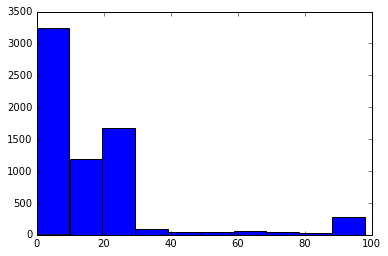

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

df3=pd.read_csv('pupfile_ready402.xls','\t') 
print df3.batch.count()
dummy_ac=pd.get_dummies(df3.Age_Cat, prefix='agecat')
print dummy_ac.describe()
del dummy_ac['agecat_Baby']
df3 = df3.join(dummy_ac)

df3['shortlist'] = [1 if x<40 else 0 for x in df3['days_on_site']]
print df3['shortlist'].describe()
#df3=df3[df3.Description.notnull()]
print df3.batch.count()
print df3.head()

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df3.days_on_site, bins=10, color='blue')


In [2]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vect = CountVectorizer(stop_words='english', max_features=20)
breed_words = count_vect.fit_transform(df3['Breed']).toarray()
print breed_words.shape
print breed_words[4]

bw=pd.DataFrame(data=breed_words, columns=count_vect.get_feature_names())
df3=df3.join(bw)
df3.head()

(6695, 20)
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


,Unnamed: 0,Posted Date,Title,type,Breed,Locale,Gender,Age_Cat,Description,city,...,miniature,mix,mutt,pit,poodle,retriever,shepherd,staffordshire,terrier,unknown
0,0,2016-04-02,Mac - Schnauzer / Affenpinscher / Mixed (mediu...,rescue,Affenpinscher-Unknown Mix,"Vacaville, CA",Male,Adult,Adopting A Shelter Dog These dogs come without...,Vacaville,...,0,1,0,0,0,0,0,0,0,1
1,1,2016-04-02,Robin - Chihuahua (short coat) Dog For Adoption,rescue,Chihuahua,"San Jacinto, CA",Female,Adult,Please contact Denise (ramonahumanesociety@yah...,San Jacinto,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-02,'WILLOW' - Labrador Retriever / Hound / Mixed ...,rescue,Labrador Retriever-Unknown Mix,"Agoura Hills, CA",Female,Adult,Meet Willow! She is an adorable loving 3 year ...,Agoura Hills,...,0,1,0,0,0,1,0,0,0,1
3,3,2016-04-02,Diego - Chihuahua / Terrier / Mixed (short coa...,rescue,Chihuahua-Unknown Mix,"VACAVILLE, CA",Male,Adult,www.fieldofdreamrescue.net Email; fieldofdream...,VACAVILLE,...,0,1,0,0,0,0,0,0,0,1
4,4,2016-04-02,WATSON - West Highland White Terrier Westie / ...,rescue,Maltese-Unknown Mix,"Pasadena, CA",Male,Adult,United Hope for Animals (UHA) is a volunteer g...,Pasadena,...,0,1,0,0,0,0,0,0,0,1


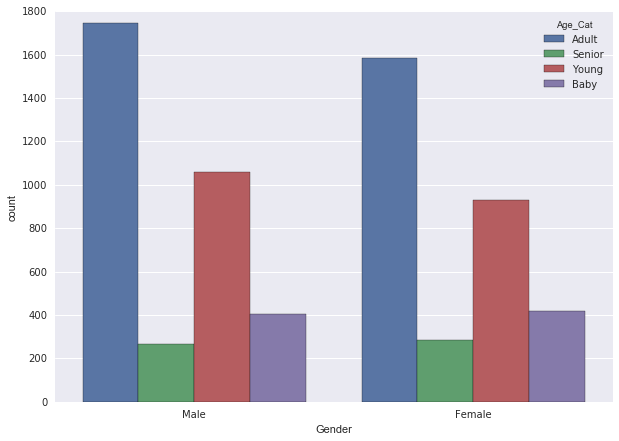

In [3]:
import seaborn as sns
sns.set_context("paper")
plt.figure(figsize=(10, 7))

sns.set(style="darkgrid")
ax = sns.countplot(x="Gender", hue="Age_Cat", data=df3)

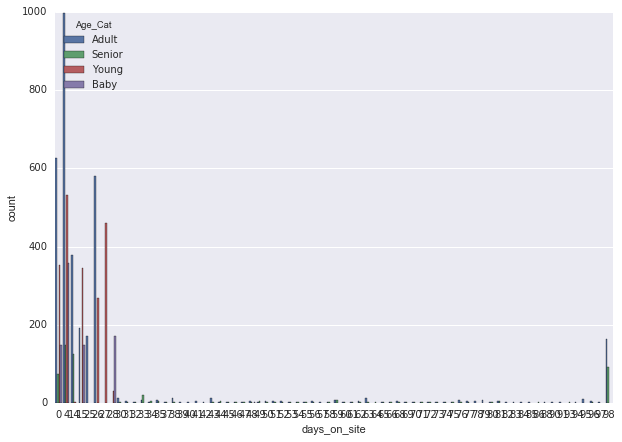

In [4]:
plt.figure(figsize=(10, 7))

ax = sns.countplot(x="days_on_site", hue="Age_Cat", data=df3)

In [5]:
df3[['subjectivity','sentiment','is_male','days_on_site','shortlist', 'Age_Cat','age']].groupby(['Age_Cat']).describe()


age  days_on_site      is_male    sentiment  \
Age_Cat                                                             
Adult   count  842.000000   3330.000000  3330.000000  3330.000000   
        mean     4.693587     18.176577     0.524024     0.189058   
        std      2.533238     24.200165     0.499498     0.143559   
        min      1.000000      0.000000     0.000000    -0.234375   
        25%      3.000000      4.000000     0.000000     0.055457   
        50%      4.000000     14.000000     1.000000     0.200539   
        75%      6.000000     26.000000     1.000000     0.284326   
        max     15.000000     98.000000     1.000000     0.850000   
Baby    count   27.000000    825.000000   825.000000   825.000000   
        mean     3.407407     10.275152     0.492121     0.220754   
        std      2.530723     10.339183     0.500241     0.144664   
        min      1.000000      0.000000     0.000000    -0.200000   
        25%      2.000000      4.000000     0.000000     0.137994   
        50%      2.000000      4.000000     0.000000     0.227130   
        75%      5.000000     15.000000     1.000000     0.305024   
        max     10.000000     48.000000     1.000000     0.616667   
Senior  count  120.000000    553.000000   553.000000   553.000000   
        mean     6.783333     31.437613     0.484629     0.189849   
        std      3.471815     35.860390     0.500216     0.145610   
        min      1.000000      0.000000     0.000000    -0.250000   
        25%      4.000000      4.000000     0.000000     0.024402   
        50%      8.000000     14.000000     0.000000     0.206510   
        75%     10.000000     58.000000     1.000000     0.295181   
        max     16.000000     98.000000     1.000000     0.700000   
Young   count  397.000000   1987.000000  1987.000000  1987.000000   
        mean     2.843829     13.848012     0.532461     0.201912   
        std      1.899174     11.095713     0.499071     0.147163   
        min      1.000000      0.000000     0.000000    -0.458333   
        25%      2.000000      4.000000     0.000000     0.110000   
        50%      2.000000     15.000000     1.000000     0.213683   
        75%      4.000000     26.000000     1.000000     0.297292   
        max     13.000000     28.000000     1.000000     0.781250   

                 shortlist  subjectivity  
Age_Cat                                   
Adult   count  3330.000000   3330.000000  
        mean      0.899099      0.394221  
        std       0.301243      0.229676  
        min       0.000000      0.000000  
        25%       1.000000      0.312500  
        50%       1.000000      0.474664  
        75%       1.000000      0.547867  
        max       1.000000      1.000000  
Baby    count   825.000000    825.000000  
        mean      0.998788      0.440651  
        std       0.034816      0.192895  
        min       0.000000      0.000000  
        25%       1.000000      0.400000  
        50%       1.000000      0.478685  
        75%       1.000000      0.552604  
        max       1.000000      0.819841  
Senior  count   553.000000    553.000000  
        mean      0.698011      0.389725  
        std       0.459536      0.232254  
        min       0.000000      0.000000  
        25%       0.000000      0.288889  
        50%       1.000000      0.466667  
        75%       1.000000      0.552604  
        max       1.000000      0.925000  
Young   count  1987.000000   1987.000000  
        mean      1.000000      0.419242  
        std       0.000000      0.207210  
        min       1.000000      0.000000  
        25%       1.000000      0.380382  
        50%       1.000000      0.478261  
        75%       1.000000      0.548425  
        max       1.000000      1.000000

In [6]:
df3['Breed'].value_counts()



Mutt                                                   913
American Pit Bull Terrier                              555
Chihuahua-Unknown Mix                                  452
Chihuahua                                              405
American Pit Bull Terrier-Unknown Mix                  404
Labrador Retriever-Unknown Mix                         300
German Shepherd Dog                                    200
German Shepherd Dog-Unknown Mix                        100
American Bulldog                                       100
American Staffordshire Terrier-Unknown Mix              96
Dachshund-Unknown Mix                                   91
American Staffordshire Terrier                          89
Boxer                                                   80
Labrador Retriever                                      80
Chiweenie                                               76
American Pit Bull Terrier-Labrador Retriever Mix        66
Dachshund                                               

In [7]:
df4=df3.copy()
df3=df3[df3.Description.notnull()]
df3['Breed'].value_counts()


Mutt                                                   812
Chihuahua-Unknown Mix                                  331
American Pit Bull Terrier                              331
Labrador Retriever-Unknown Mix                         277
American Pit Bull Terrier-Unknown Mix                  270
Chihuahua                                              233
German Shepherd Dog                                    170
American Bulldog                                        99
American Staffordshire Terrier-Unknown Mix              83
Dachshund-Unknown Mix                                   83
American Staffordshire Terrier                          78
Boxer                                                   75
German Shepherd Dog-Unknown Mix                         73
Chiweenie                                               72
Labrador Retriever                                      62
Dachshund                                               57
Poodle (Miniature)-Unknown Mix                          

In [8]:

df3[['subjectivity','sentiment','is_male','days_on_site','shortlist', 'Age_Cat','age']].groupby(['Age_Cat']).describe()


age  days_on_site      is_male    sentiment  \
Age_Cat                                                             
Adult   count  842.000000   2616.000000  2616.000000  2616.000000   
        mean     4.693587     21.134174     0.517584     0.240659   
        std      2.533238     25.724024     0.499786     0.117530   
        min      1.000000      0.000000     0.000000    -0.234375   
        25%      3.000000      4.000000     0.000000     0.169180   
        50%      4.000000     14.000000     1.000000     0.233561   
        75%      6.000000     26.000000     1.000000     0.302602   
        max     15.000000     98.000000     1.000000     0.850000   
Baby    count   27.000000    726.000000   726.000000   726.000000   
        mean     3.407407     11.002755     0.490358     0.250857   
        std      2.530723     10.646806     0.500252     0.127372   
        min      1.000000      0.000000     0.000000    -0.200000   
        25%      2.000000      4.000000     0.000000     0.171828   
        50%      2.000000      4.000000     0.000000     0.241639   
        75%      5.000000     15.000000     1.000000     0.324777   
        max     10.000000     48.000000     1.000000     0.616667   
Senior  count  120.000000    427.000000   427.000000   427.000000   
        mean     6.783333     36.011710     0.482436     0.245871   
        std      3.471815     37.035098     0.500278     0.116907   
        min      1.000000      0.000000     0.000000    -0.250000   
        25%      4.000000      4.000000     0.000000     0.174596   
        50%      8.000000     14.000000     0.000000     0.245833   
        75%     10.000000     67.000000     1.000000     0.312732   
        max     16.000000     98.000000     1.000000     0.700000   
Young   count  397.000000   1689.000000  1689.000000  1689.000000   
        mean     2.843829     15.136767     0.531083     0.237536   
        std      1.899174     11.101786     0.499181     0.130434   
        min      1.000000      0.000000     0.000000    -0.458333   
        25%      2.000000      4.000000     0.000000     0.166667   
        50%      2.000000     15.000000     1.000000     0.233861   
        75%      4.000000     27.000000     1.000000     0.308872   
        max     13.000000     28.000000     1.000000     0.781250   

                 shortlist  subjectivity  
Age_Cat                                   
Adult   count  2616.000000   2616.000000  
        mean      0.879205      0.501818  
        std       0.325951      0.114628  
        min       0.000000      0.000000  
        25%       1.000000      0.442857  
        50%       1.000000      0.506250  
        75%       1.000000      0.566667  
        max       1.000000      1.000000  
Baby    count   726.000000    726.000000  
        mean      0.998623      0.500740  
        std       0.037113      0.110267  
        min       0.000000      0.000000  
        25%       1.000000      0.447654  
        50%       1.000000      0.496667  
        75%       1.000000      0.563636  
        max       1.000000      0.819841  
Senior  count   427.000000    427.000000  
        mean      0.644028      0.504726  
        std       0.479368      0.108243  
        min       0.000000      0.000000  
        25%       0.000000      0.439539  
        50%       1.000000      0.507258  
        75%       1.000000      0.571861  
        max       1.000000      0.925000  
Young   count  1689.000000   1689.000000  
        mean      1.000000      0.493211  
        std       0.000000      0.118372  
        min       1.000000      0.000000  
        25%       1.000000      0.436458  
        50%       1.000000      0.500339  
        75%       1.000000      0.559722  
        max       1.000000      1.000000

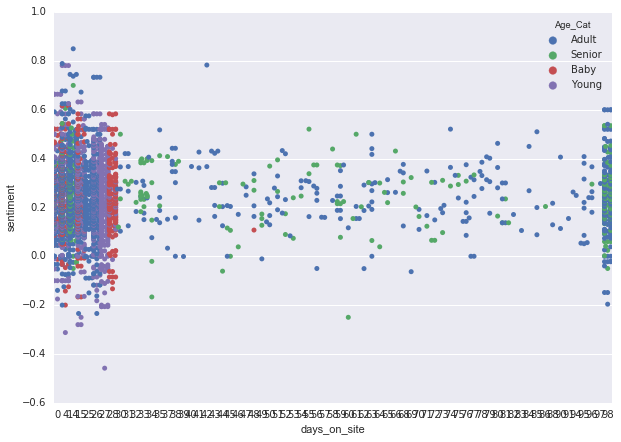

In [9]:
plt.figure(figsize=(10, 7))

sns.swarmplot(x='days_on_site', y='sentiment', hue='Age_Cat', data=df3)


In [10]:
df3.groupby(['Age_Cat']).describe()


Unnamed: 0         age  agecat_Adult  agecat_Senior  \
Age_Cat                                                               
Adult   count  2616.000000  842.000000          2616           2616   
        mean   3533.743119    4.693587             1              0   
        std    1901.212894    2.533238             0              0   
        min       0.000000    1.000000             1              0   
        25%    1920.750000    3.000000             1              0   
        50%    3623.000000    4.000000             1              0   
        75%    4991.250000    6.000000             1              0   
        max    6693.000000   15.000000             1              0   
Baby    count   726.000000   27.000000           726            726   
        mean   3211.365014    3.407407             0              0   
        std    1914.953387    2.530723             0              0   
        min       7.000000    1.000000             0              0   
        25%    1646.500000    2.000000             0              0   
        50%    2933.500000    2.000000             0              0   
        75%    4347.750000    5.000000             0              0   
        max    6233.000000   10.000000             0              0   
Senior  count   427.000000  120.000000           427            427   
        mean   4181.615925    6.783333             0              1   
        std    2124.143905    3.471815             0              0   
        min       5.000000    1.000000             0              1   
        25%    2436.500000    4.000000             0              1   
        50%    3598.000000    8.000000             0              1   
        75%    6337.000000   10.000000             0              1   
        max    6694.000000   16.000000             0              1   
Young   count  1689.000000  397.000000          1689           1689   
        mean   3689.846063    2.843829             0              0   
        std    1878.244157    1.899174             0              0   
        min       8.000000    1.000000             0              0   
        25%    1993.000000    2.000000             0              0   
        50%    4137.000000    2.000000             0              0   
        75%    5488.000000    4.000000             0              0   
        max    6086.000000   13.000000             0              0   

               agecat_Young     american   australian  batch        boxer  \
Age_Cat                                                                     
Adult   count          2616  2616.000000  2616.000000   2616  2616.000000   
        mean              0     0.205275     0.016820    402     0.027905   
        std               0     0.418852     0.128620      0     0.164733   
        min               0     0.000000     0.000000    402     0.000000   
        25%               0     0.000000     0.000000    402     0.000000   
        50%               0     0.000000     0.000000    402     0.000000   
        75%               0     0.000000     0.000000    402     0.000000   
        max               0     2.000000     1.000000    402     1.000000   
Baby    count           726   726.000000   726.000000    726   726.000000   
        mean              0     0.140496     0.022039    402     0.013774   
        std               0     0.378143     0.146910      0     0.116632   
        min               0     0.000000     0.000000    402     0.000000   
        25%               0     0.000000     0.000000    402     0.000000   
        50%               0     0.000000     0.000000    402     0.000000   
        75%               0     0.000000     0.000000    402     0.000000   
        max               0     2.000000     1.000000    402     1.000000   
Senior  count           427   427.000000   427.000000    427   427.000000   
        mean              0     0.215457     0.009368    402     0.025761   
        std               0     0.428388     0.096445      0 

In [11]:
df3['Breed'].value_counts()


Mutt                                                   812
Chihuahua-Unknown Mix                                  331
American Pit Bull Terrier                              331
Labrador Retriever-Unknown Mix                         277
American Pit Bull Terrier-Unknown Mix                  270
Chihuahua                                              233
German Shepherd Dog                                    170
American Bulldog                                        99
American Staffordshire Terrier-Unknown Mix              83
Dachshund-Unknown Mix                                   83
American Staffordshire Terrier                          78
Boxer                                                   75
German Shepherd Dog-Unknown Mix                         73
Chiweenie                                               72
Labrador Retriever                                      62
Dachshund                                               57
Poodle (Miniature)-Unknown Mix                          

In [12]:
df3.drop(['Unnamed: 0','Posted Date','Title','type','Breed','Locale','Gender','Age_Cat','Description','city','state','age','batch'],axis=1,inplace=True)
df4.drop(['subjectivity','sentiment','Unnamed: 0','Posted Date','Title','type','Breed','Locale','Gender','Age_Cat','Description','city','state','age','batch'],axis=1,inplace=True)
print df3.columns.values


['is_male' 'is_rescue' 'days_on_site' 'sentiment' 'subjectivity'
 'agecat_Adult' 'agecat_Senior' 'agecat_Young' 'shortlist' u'american'
 u'australian' u'boxer' u'bull' u'bulldog' u'chihuahua' u'dachshund' u'dog'
 u'german' u'labrador' u'miniature' u'mix' u'mutt' u'pit' u'poodle'
 u'retriever' u'shepherd' u'staffordshire' u'terrier' u'unknown']


In [13]:
#there no records without descriptions in df3
X=df3.copy()
y=X['days_on_site']
X.drop(['days_on_site','shortlist'],axis=1, inplace=True)
XL=df3.copy()
yL=XL['shortlist']
XL.drop(['days_on_site','shortlist'],axis=1, inplace=True)
print y.head()
print yL.head()

0    0
1    0
2    0
3    0
4    0
Name: days_on_site, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: shortlist, dtype: int64


In [15]:
from sklearn import linear_model
import random
from sklearn import feature_selection
import statsmodels.formula.api as smf
from sklearn import metrics

lm_lasso = linear_model.Lasso().fit(X,y)
print lm_lasso.coef_
print lm_lasso.intercept_

[ 0.          0.         -0.          0.          0.52657824  4.70832842
 -0.15283189  0.         -0.          0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.          0.         -0.        ]
18.5210971335


In [15]:
lm_ridge = linear_model.Ridge().fit(X,y)
lm_ridge.coef_

array([  1.17181193,   0.        , -10.57004772,   8.73994564,
         9.65308569,  24.22091348,   3.37877476,   1.75880418,
        -5.6737729 ,   5.81138396,   2.17570988,   3.25065799,
         1.22613144,  -4.24294168,   3.51650712,   1.79213365,
         7.30156687,   1.68404986,  -0.3386254 ,  -1.47674481,
        -0.51274584,  -7.61052884,  -5.70544078,  -0.09832904,
         0.43841874,   0.15647589,  -2.34796196])

In [16]:
lm_linear = linear_model.LinearRegression().fit(X,y)
lm_linear.coef_

array([  1.16906360e+00,   7.99360578e-15,  -1.08596867e+01,
         9.03110044e+00,   9.71419426e+00,   2.43380666e+01,
         3.43565273e+00,   1.76075764e+00,  -5.75797387e+00,
         5.83531213e+00,   2.18656090e+00,   3.25949869e+00,
         1.21469260e+00,  -4.27813783e+00,   3.56495791e+00,
         1.72570761e+00,   7.64182947e+00,   1.76086261e+00,
        -3.10780347e-01,  -1.46601182e+00,  -5.23152287e-01,
        -7.73597827e+00,  -6.04277640e+00,  -7.30371762e-02,
         4.32261848e-01,   1.46882350e-01,  -2.36367364e+00])

In [17]:
#df4 does not have sentiment but has all records even where description was blank
X=df4.copy()
y=X['days_on_site']
X.drop(['days_on_site','shortlist'],axis=1, inplace=True)
XL=df4.copy()
yL=XL['shortlist']
XL.drop(['days_on_site','shortlist'],axis=1, inplace=True)
print y.head()
print yL.head()

0    0
1    0
2    0
3    0
4    0
Name: days_on_site, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: shortlist, dtype: int64


In [18]:
print X.columns.values
lm_lasso = linear_model.Lasso().fit(X,y)
lm_lasso.coef_



['is_male' 'is_rescue' 'agecat_Adult' 'agecat_Senior' 'agecat_Young'
 u'american' u'australian' u'boxer' u'bull' u'bulldog' u'chihuahua'
 u'dachshund' u'dog' u'german' u'labrador' u'miniature' u'mix' u'mutt'
 u'pit' u'poodle' u'retriever' u'shepherd' u'staffordshire' u'terrier'
 u'unknown']


array([ 0.        ,  0.        ,  0.        ,  2.52597271, -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [19]:
lm_ridge = linear_model.Ridge().fit(X,y)
lm_ridge.coef_

array([  1.00543469,   0.        ,   7.87595138,  21.1828431 ,
         3.16505368,   1.56150538,  -6.35284617,   5.42462513,
         2.18984542,   2.77430058,  -1.39115095,  -3.3520086 ,
         0.93335013,   2.14791463,   7.16435437,   1.10391214,
         1.082954  ,  -1.16996984,  -3.90613552,  -7.67927426,
        -5.31961073,   0.44388008,   0.98386945,   0.37324621,  -3.45135203])

In [20]:
lm_linear = linear_model.LinearRegression().fit(X,y)
lm_linear.coef_

array([  1.00374906e+00,  -8.43769499e-15,   7.92361469e+00,
         2.12681278e+01,   3.20828005e+00,   1.58589177e+00,
        -6.42622782e+00,   5.44638151e+00,   2.24670101e+00,
         2.75671080e+00,  -1.40223489e+00,  -3.38061864e+00,
         9.40323516e-01,   2.10970106e+00,   7.47006668e+00,
         1.16269694e+00,   1.10699133e+00,  -1.17082724e+00,
        -3.98733720e+00,  -7.78699916e+00,  -5.62600717e+00,
         4.73377956e-01,   9.54326230e-01,   3.61489113e-01,
        -3.46960485e+00])

In [21]:
lm_log = linear_model.LogisticRegression().fit(XL,yL)
print lm_log.coef_
print lm_log.intercept_


[[-0.15527228  2.40804049 -2.56787091 -3.9376274   2.1837736  -0.80024934
   0.75668633 -0.59543873 -0.24469315 -0.19198844  0.35037539  1.19752033
  -0.15545974 -0.52545778 -0.59845413  1.22903545 -0.07218271  0.01454745
   0.28983521  1.3920952   0.03239152  0.03685173 -0.01093912  0.52119905
   0.43402662]]
[ 2.40804049]


In [22]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier  #VotingClassifier is part of sklearn.ensemble
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier(max_depth=5, n_estimators = 2000)
clf3 = BernoulliNB()
clf4 = MultinomialNB()
clf5 = GaussianNB()
clf6 = KNeighborsClassifier(n_neighbors=3)



In [23]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('bnb', clf3),('mnb',clf4),('gnb',clf5),('knn',clf6)], voting='hard')
for clf in [clf1,clf2,clf3,clf4,clf5,clf6,eclf]:
    scores = cross_validation.cross_val_score(clf, XL, yL, cv=5, scoring='accuracy')
    print scores.mean()

0.92008993669
0.924720035059
0.914120679669
0.921583923236
0.426167020869
0.921134823776
0.920538255217


In [24]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('bnb', clf3), ('mnb',clf4), ('gnb',clf5), ('knn',clf6)], voting='soft')
for clf in [clf1,clf2,clf3,clf4,clf5,clf6, eclf]:
    scores = cross_validation.cross_val_score(clf, XL, yL, cv=5, scoring='accuracy')
    print scores.mean()

0.92008993669
0.924720035059
0.914120679669
0.921583923236
0.426167020869
0.921134823776
0.920239524821


In [25]:
df4.shortlist.describe()

count    6695.000000
mean        0.924720
std         0.263862
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: shortlist, dtype: float64

In [24]:
#df3 has sentiment
XL=df3.copy()
yL=XL['shortlist']
print 'mean: ', yL.mean()
XL.drop(['days_on_site','shortlist'],axis=1, inplace=True)
#print XL.columns.values
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('bnb', clf3)], voting='hard')
for clf in [clf1,clf2,clf3,eclf]:
    scores = cross_validation.cross_val_score(clf, XL, yL, cv=10, scoring='accuracy')
    print scores.mean()

mean:  0.914071088311
0.910958037061
0.914071590175
0.898318654385
0.910958037061


In [27]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('bnb', clf3), ('gnb',clf5), ('knn',clf6)], voting='soft')
for clf in [clf1,clf2,clf3,clf5,clf6, eclf]:
    scores = cross_validation.cross_val_score(clf, XL, yL, cv=5, scoring='accuracy')
    print scores.mean()

0.908576469402
0.914071310952
0.896856537957
0.449496925093
0.885317740364
0.897222166213


In [28]:
yL.describe()


count    5458.000000
mean        0.914071
std         0.280285
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: shortlist, dtype: float64